In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\varni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\varni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\varni\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
df = pd.read_csv("C:/Users/varni/Desktop/6th sem mini project+ppt/IMDB Dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
df.shape

(50000, 2)

In [5]:
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
#convert to string
df['review'] = df['review'].astype(str) 
df.dtypes

review       object
sentiment    object
dtype: object

In [7]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
df = df.drop_duplicates(subset=['review'])
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


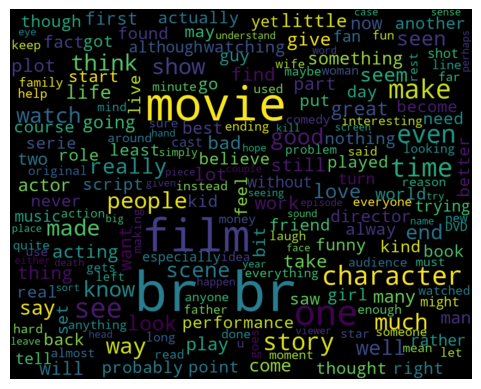

In [9]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([comnt for comnt in df['review']])
wordCloud = WordCloud(width =1000, height =800, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [10]:
# Get the percentage of positive comment
pcomment = df[df.sentiment == 'positive']
pcomment = pcomment['review']
round((pcomment.shape[0]/df.shape[0]*100), 1)

50.2

In [11]:
# Get the percentage of negative comment
ncomment = df[df.sentiment == 'negative']
ncomment = ncomment['review']
round((ncomment.shape[0]/df.shape[0]*100), 1)

49.8

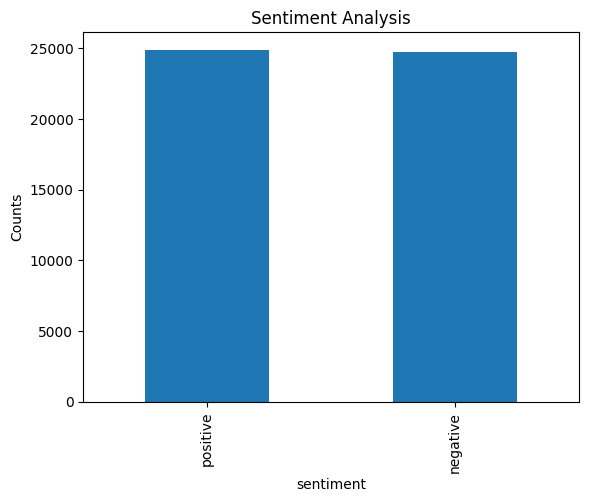

In [12]:
import matplotlib.pyplot as plt
import numpy as np
# Displaying the Sentiment Coutns
df['sentiment'].value_counts()
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['sentiment'].value_counts().plot(kind='bar')
plt.show()

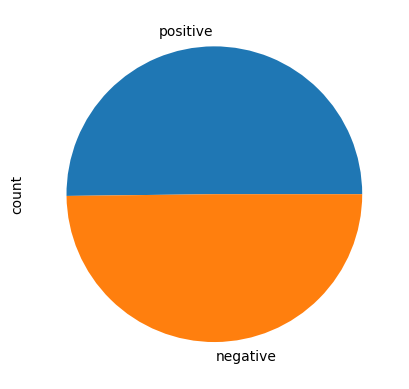

In [13]:
df['sentiment'].value_counts().plot(kind='pie')
plt.show()

In [14]:
def data_summary(df):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(df.review) for word in t.strip().split()]
    class_label= [k for k,v in df.sentiment.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(df[df.sentiment==label].review) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(df[df.sentiment==label].review)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(df[df.sentiment==label].review))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(df)


Class Name :  positive
Number of Documents:24884
Number of Words:5800227
Number of Unique Words:251217
Most Frequent Words:

the	325111
and	170782
a	160440
of	150236
to	129177
is	108654
in	95343
i	66516
it	64530
this	63902

Class Name :  negative
Number of Documents:24698
Number of Words:5670577
Number of Unique Words:244858
Most Frequent Words:

the	308870
a	153968
and	140596
of	134372
to	133422
is	94834
in	83144
i	73877
this	73496
that	65536
Total Number of Unique Words:390931


                          **Preprocessing**

Lower casing

In [15]:
df['review']=df['review'].apply(lambda x: x.lower())

Punctuation Remove

In [16]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['review']= df['review'].apply(lambda x:remove_punctuation(x))
# df.iloc[[31]]
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


Removing URLs

In [18]:
df['review'] = df['review'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
C:\Users\varni\AppData\Local\Temp\ipykernel_14164\768158312.py:1: SyntaxWarning: invalid escape sequence '\('
  df['review'] = df['review'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')


Stopwords

It allows us to get rid of commonly used words.

In [19]:
def remove_stop(x):
  return ",".join([word for word in str(x).split() if word not in stop_words]) #stopwords removal)
df['review'] = df['review'].apply(lambda x: remove_stop(x))
df

,review,sentiment
0,"one,reviewers,mentioned,watching,1,oz,episode,...",positive
1,"wonderful,little,production,br,br,filming,tech...",positive
2,"thought,wonderful,way,spend,time,hot,summer,we...",positive
3,"basically,theres,family,little,boy,jake,thinks...",negative
4,"petter,matteis,love,time,money,visually,stunni...",positive
...,...,...
49995,"thought,movie,right,good,job,wasnt,creative,or...",positive
49996,"bad,plot,bad,dialogue,bad,acting,idiotic,direc...",negative
49997,"catholic,taught,parochial,elementary,schools,n...",negative
49998,"im,going,disagree,previous,comment,side,maltin...",negative


Remove emoji’s

In [20]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['review'] = df['review'].apply(lambda x: remove_emoji(x))
df.iloc[[4,6,7,5,8,9,10]]

,review,sentiment
4,"petter,matteis,love,time,money,visually,stunni...",positive
6,"sure,would,like,see,resurrection,dated,seahunt...",positive
7,"show,amazing,fresh,innovative,idea,70s,first,a...",negative
5,"probably,alltime,favorite,movie,story,selfless...",positive
8,"encouraged,positive,comments,film,looking,forw...",negative
9,"like,original,gut,wrenching,laughter,like,movi...",positive
10,"phil,alien,one,quirky,films,humour,based,aroun...",negative


Tokenization

break sentences into parts

In [21]:
# df['Customer_reviewText'] = df['Customer_reviewText'].astype(str)

In [22]:
from textblob import Word, TextBlob

In [24]:
df["review"]=df["review"].apply(lambda x: TextBlob(x).words)
df

,review,sentiment
0,"[one, reviewers, mentioned, watching,1, oz, ep...",positive
1,"[wonderful, little, production, br, br, filmin...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, theres, family, little, boy, jake,...",negative
4,"[petter, matteis, love, time, money, visually,...",positive
...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...",positive
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative
49997,"[catholic, taught, parochial, elementary, scho...",negative
49998,"[im, going, disagree, previous, comment, side,...",negative


Stemming

In [25]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

In [26]:
df['review'] = df['review'].apply(lambda x: [porter.stem(y) for y in x])
df

,review,sentiment
0,"[one, review, mention, watching,1, oz, episod,...",positive
1,"[wonder, littl, product, br, br, film, techniq...",positive
2,"[thought, wonder, way, spend, time, hot, summe...",positive
3,"[basic, there, famili, littl, boy, jake, think...",negative
4,"[petter, mattei, love, time, money, visual, st...",positive
...,...,...
49995,"[thought, movi, right, good, job, wasnt, creat...",positive
49996,"[bad, plot, bad, dialogu, bad, act, idiot, dir...",negative
49997,"[cathol, taught, parochi, elementari, school, ...",negative
49998,"[im, go, disagre, previou, comment, side, malt...",negative


Lemmatization 

is the process of separating words by root

In [27]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [28]:
df['review'] = df['review'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x])
df

,review,sentiment
0,"[one, review, mention, watching,1, oz, episod,...",positive
1,"[wonder, littl, product, br, br, film, techniq...",positive
2,"[thought, wonder, way, spend, time, hot, summe...",positive
3,"[basic, there, famili, littl, boy, jake, think...",negative
4,"[petter, mattei, love, time, money, visual, st...",positive
...,...,...
49995,"[thought, movi, right, good, job, wasnt, creat...",positive
49996,"[bad, plot, bad, dialogu, bad, act, idiot, dir...",negative
49997,"[cathol, taught, parochi, elementari, school, ...",negative
49998,"[im, go, disagre, previou, comment, side, malt...",negative


In [29]:
# distribution of the three classes
df['sentiment'].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

LabelEncoder

In [30]:
from sklearn.preprocessing import LabelEncoder
df['sentiment'] = LabelEncoder().fit_transform(df['sentiment'])
df['sentiment']

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 49582, dtype: int32

In [31]:
df['review'] = df['review'].astype(str)
df['review']

0        ['one', 'review', 'mention', 'watching,1', 'oz...
1        ['wonder', 'littl', 'product', 'br', 'br', 'fi...
2        ['thought', 'wonder', 'way', 'spend', 'time', ...
3        ['basic', 'there', 'famili', 'littl', 'boy', '...
4        ['petter', 'mattei', 'love', 'time', 'money', ...
                               ...                        
49995    ['thought', 'movi', 'right', 'good', 'job', 'w...
49996    ['bad', 'plot', 'bad', 'dialogu', 'bad', 'act'...
49997    ['cathol', 'taught', 'parochi', 'elementari', ...
49998    ['im', 'go', 'disagre', 'previou', 'comment', ...
49999    ['one', 'expect', 'star', 'trek', 'movi', 'hig...
Name: review, Length: 49582, dtype: object

In [32]:
x = df.review.values
y= df.sentiment.values


In [33]:
x.shape,y.shape

((49582,), (49582,))

Feature Extraction

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
# Create a TF-IDF Vectorizer
tf_vector =  TfidfVectorizer()
tf_x = tf_vector.fit(x)
tf_x = tf_x.transform(x)

# Create a CountVectorizer
vectorizer = CountVectorizer()
vector_fit =  vectorizer.fit(x)
vector_test = vectorizer.transform(x)

In [36]:
tf_x.shape,vector_test.shape

((49582, 147731), (49582, 147731))

over_sampling

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_x, y, train_size=0.80, shuffle=True, random_state=75)

In [38]:
X_train.shape, X_test.shape

((39665, 147731), (9917, 147731))

In [39]:
y_test.shape

(9917,)

ML Algorithm

Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
#Model fitting
rf.fit(X_train,y_train)
 
#testing the model
rf.score(X_test,y_test)

0.8521730362004638

In [41]:
pred = rf.predict(X_test) 

In [42]:
# comment=['Bad qualilty..... material qualilty is very poor',
#          'Best service ever. On time, products as promised. Great quality.',
#          'I buy this product from bangladesh']
comment = input()
print("Input Text:",comment)
tf1_comment = tf_vector.transform([comment])
result = rf.predict(tf1_comment)
if result[0] == 1:
  print('positive')
elif result[0] == 0:
  print('negative')


Input Text: 
positive


Confusion Matrix

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support,classification_report 

In [44]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4966
           1       0.85      0.86      0.85      4951

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<Axes: >

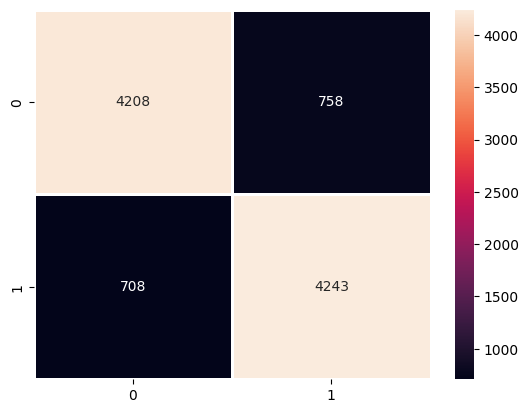

In [46]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

Support Vector Machine

In [47]:
from sklearn.svm import SVC

In [48]:
model_svm = SVC()

In [49]:
model_svm.fit(X_train,y_train)

SVC()

In [50]:
model_svm.score(X_test,y_test)

0.898860542502773

In [51]:
pred = model_svm.predict(X_test)

In [52]:
comment=['this product is poor','Product is very good, fit is good']
tf1_comment = tf_vector.transform(comment)
model_svm.predict(tf1_comment)

array([0, 1])

Confusion Matrix

In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4966
           1       0.89      0.91      0.90      4951

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917



<Axes: >

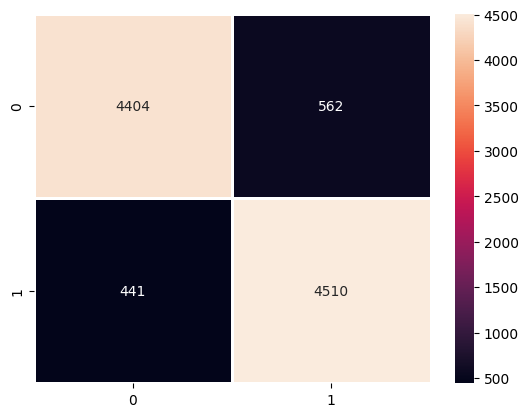

In [55]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

0.7165473429464556

In [58]:
pred = classifier.predict(X_test)

In [59]:
comment=['this product is poor quality','After trying many products of different brands, this one is the best!!']

tf1_comment = tf_vector.transform(comment)

classifier.predict(tf1_comment)

array([0, 1])

Confusion Matrix

In [60]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      4966
           1       0.72      0.71      0.72      4951

    accuracy                           0.72      9917
   macro avg       0.72      0.72      0.72      9917
weighted avg       0.72      0.72      0.72      9917



<Axes: >

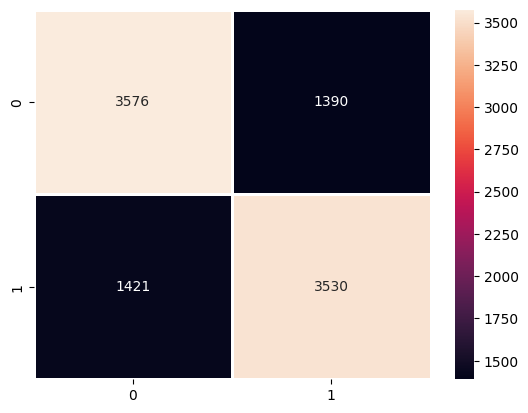

In [61]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
 
model=LogisticRegression()
 
#Model fitting
model.fit(X_train,y_train)
 
#testing the model
model.score(X_test,y_test)

0.8963396188363416

In [63]:
pred = model.predict(X_test)

In [64]:
comment=['it is bad product','this product is good for me and I am satisfied with this product']

tf1_comment = tf_vector.transform(comment)

model.predict(tf1_comment)

array([0, 1])

Confusion Matrix

In [65]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4966
           1       0.89      0.91      0.90      4951

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917



<Axes: >

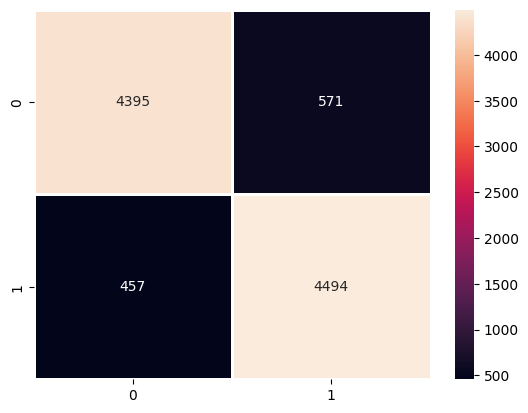

In [66]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

Multinomial Naive Bayes

In [67]:
from sklearn.naive_bayes import MultinomialNB

In [68]:
model = MultinomialNB()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.862861752546133

In [69]:
import seaborn as sns

In [70]:
pred = model.predict(X_test)

In [71]:
comment=['Bad qualilty..... material qualilty is very poor',
         'Best service ever. On time, products as promised. Great quality.']
tf1_comment = tf_vector.transform(comment)
model.predict(tf1_comment)

array([0, 1])

Confusion Matrix

In [72]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred))


Classification Report

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4966
           1       0.87      0.85      0.86      4951

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



<Axes: >

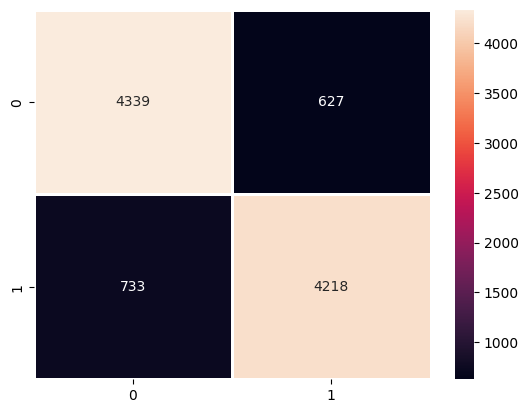

In [73]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

K-Nearest Neighbors Classifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
#Model fitting
knn.fit(X_train,y_train)
 
#testing the model
knn.score(X_test,y_test)

0.7854189775133609

In [75]:
pred = knn.predict(X_test)

In [76]:
comment=['this product is poor for me and I am not satisfied with this product',
         'Product is very good, fit is good']

tf1_comment = tf_vector.transform(comment)

knn.predict(tf1_comment)

array([0, 1])

Confusion Matrix

In [77]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77      4966
           1       0.75      0.86      0.80      4951

    accuracy                           0.79      9917
   macro avg       0.79      0.79      0.78      9917
weighted avg       0.79      0.79      0.78      9917



<Axes: >

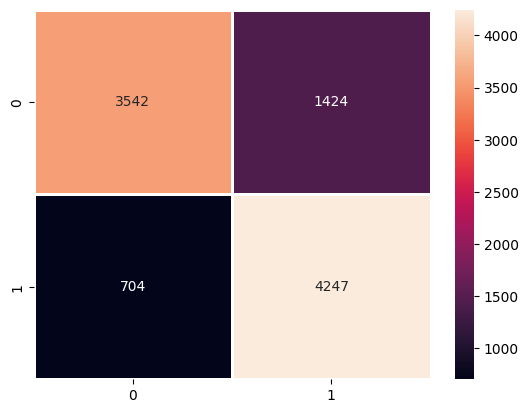

In [78]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

Algorithm For Count Vectorizer

over_sampling

In [79]:
from imblearn.over_sampling import SMOTE, ADASYN
import collections
x_resampled, y_resampled = SMOTE().fit_resample(vector_test,y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 24884), (1, 24884)]


In [80]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, train_size=0.80, shuffle=True, random_state=95)

Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
#Model fitting
rf.fit(X_train,y_train)
 
#testing the model
rf.score(X_test,y_test)

0.8515169780992565

In [82]:
pred = rf.predict(X_test) 

In [83]:
# comment=['Bad qualilty..... material qualilty is very poor',
#          'Best service ever. On time, products as promised. Great quality.',
#          'I buy this product from bangladesh']
comment = ['Best service ever. On time, products as promised. Great quality.']
tf1_comment = vectorizer.transform(comment)
result = rf.predict(tf1_comment)
if result[0] == 1:
  print('positive')
elif result[0] == 0:
  print('negative')

positive


Confusion Matrix

In [84]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4985
           1       0.85      0.85      0.85      4969

    accuracy                           0.85      9954
   macro avg       0.85      0.85      0.85      9954
weighted avg       0.85      0.85      0.85      9954



<Axes: >

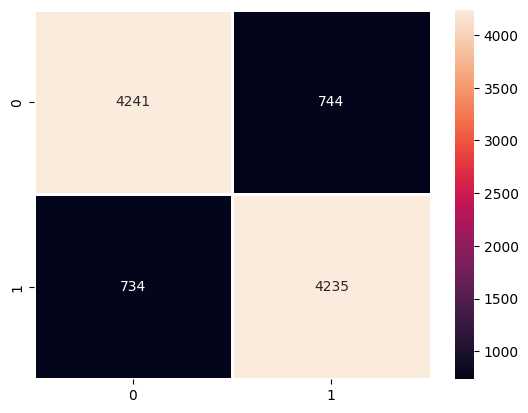

In [85]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

Support Vector Machine

In [86]:
from sklearn.svm import SVC

In [87]:
model_svm = SVC()

In [88]:
model_svm.fit(X_train,y_train)
model_svm.score(X_test,y_test)

0.8767329716696806

In [89]:
pred = model_svm.predict(X_test)

In [90]:
comment=['this product is poor','Product is very good, fit is good']
vect_comment = vectorizer.transform(comment)
model_svm.predict(vect_comment)

array([0, 1])

Confusion Matrix

In [94]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      4985
           1       0.86      0.90      0.88      4969

    accuracy                           0.88      9954
   macro avg       0.88      0.88      0.88      9954
weighted avg       0.88      0.88      0.88      9954



<Axes: >

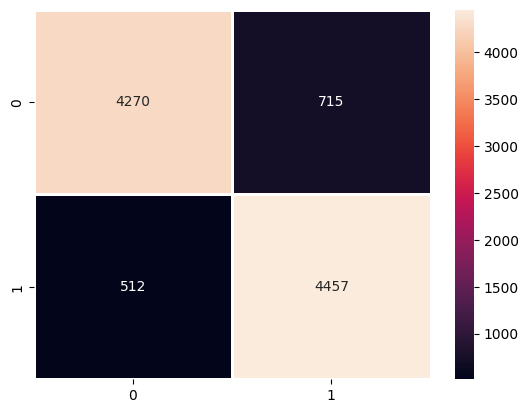

In [92]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

Decision Tree Classifier

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

0.720112517580872

In [97]:
pred = classifier.predict(X_test)

Confusion Matrix

In [98]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72      4985
           1       0.72      0.73      0.72      4969

    accuracy                           0.72      9954
   macro avg       0.72      0.72      0.72      9954
weighted avg       0.72      0.72      0.72      9954



<Axes: >

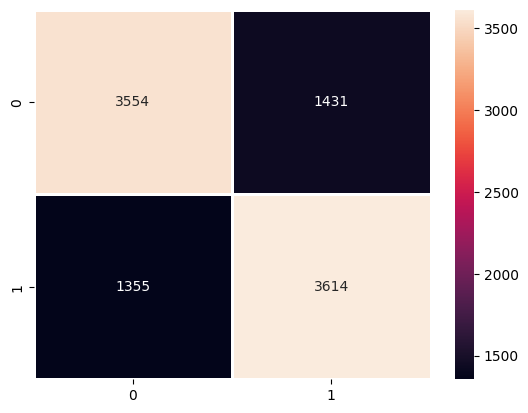

In [99]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression
 
model=LogisticRegression()
 
#Model fitting
model.fit(X_train,y_train)
 
#testing the model
model.score(X_test,y_test)

c:\Users\varni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8877838055053245

In [101]:
pred = model.predict(X_test)

Confusion Matrix

In [102]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4985
           1       0.89      0.89      0.89      4969

    accuracy                           0.89      9954
   macro avg       0.89      0.89      0.89      9954
weighted avg       0.89      0.89      0.89      9954



<Axes: >

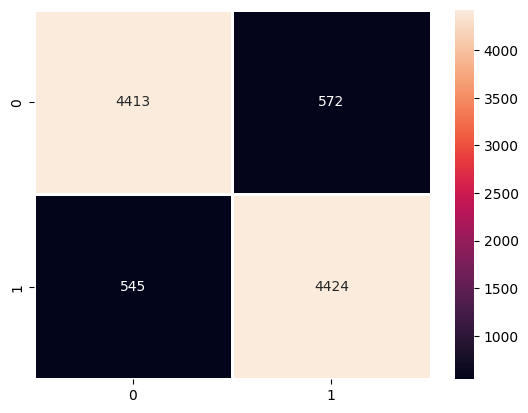

In [103]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

Multinomial Naive Bayes

In [104]:
from sklearn.naive_bayes import MultinomialNB

In [105]:
model = MultinomialNB()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8513160538476994

In [106]:
pred = model.predict(X_test)

Confusion Matrix

In [107]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      4985
           1       0.86      0.84      0.85      4969

    accuracy                           0.85      9954
   macro avg       0.85      0.85      0.85      9954
weighted avg       0.85      0.85      0.85      9954



<Axes: >

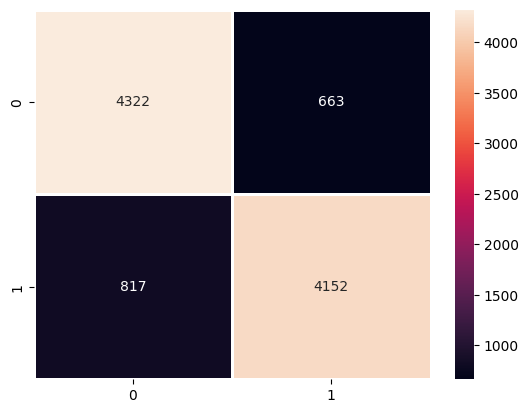

In [108]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

K-Nearest Neighbors Classifier

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
#Model fitting
knn.fit(X_train,y_train)
 
#testing the model
knn.score(X_test,y_test)

0.5627888286116134

In [110]:
pred = knn.predict(X_test)

Confusion Matrix

In [111]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.54      0.94      0.68      4985
           1       0.76      0.18      0.30      4969

    accuracy                           0.56      9954
   macro avg       0.65      0.56      0.49      9954
weighted avg       0.65      0.56      0.49      9954



<Axes: >

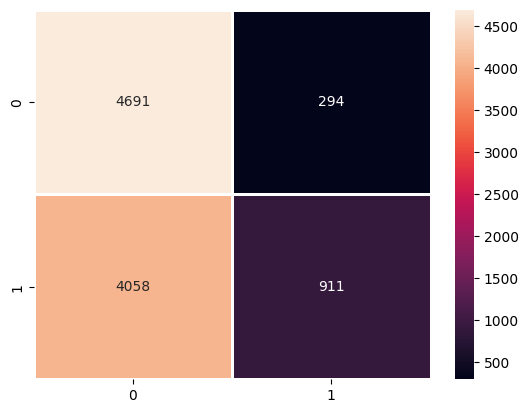

In [112]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')